b1 : 18.50118634521492

b0 : 963.191336472558

b: 
Intercept    963.191336
roe           18.501186
dtype: float64



FileNotFoundError: [Errno 2] No such file or directory: 'PyGraphs/Example-2-3-3.pdf'

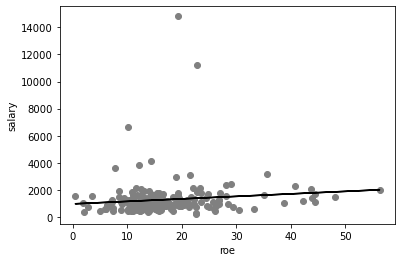

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 28 15:06:56 2022

@author: zoeyroberts
"""

### part 1 

## a 2.1
import wooldridge as woo
import numpy as np

ceosal1 = woo.dataWoo('ceosal1')
x = ceosal1['roe']
y = ceosal1['salary']

# ingredients to the OLS formulas:
cov_xy = np.cov(x,y)[1,0] # access 2. row and 1. column of covariance matrix
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)

# manual calculation of OLS
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'b1 : {b1}\n')
print(f'b0 : {b0}\n')

## b 2.2
import wooldridge as woo 
import statsmodels.formula.api as smf

ceosal1 = woo.dataWoo('ceosal1')

reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

## c 2.3
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

ceosal1 = woo.dataWoo('ceosal1')

# OLS regression:
reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()

# scatter plot and fitted values:
plt.plot('roe','salary', data=ceosal1, color='grey', marker='o', linestyle='')
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('salary')
plt.xlabel('roe')
plt.savefig('PyGraphs/Example-2-3-3.pdf')

## d 2.6
import pandas as pd

ceosal1 = woo.dataWoo('ceosal1')

# OLS regression:
reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()

# obtain predicted values and residuals:
salary_hat = results.fittedvalues
u_hat = results.resid

# Wooldridge, Table 2.2:
table = pd.DataFrame({'roe': ceosal1['roe'],
                      'salary': ceosal1['salary'],
                      'salary_hat': salary_hat,
                      'u_hat': u_hat})
print(f'table.head(15): \n{table.head(15)}\n')

## e 2.9
import pandas as pd

vote1 = woo.dataWoo('vote1')

#OLS regression:
reg = smf.ols(formula='voteA ~ shareA', data=vote1)
results = reg.fit()

# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

## f 2.13
import numpy as np

meap93 = woo.dataWoo('meap93')

# estimate the model and save the results as "results":
reg = smf.ols(formula='math10 ~ lnchprg', data=meap93)
results = reg.fit()

# number of obs.:
n = results.nobs

# SER: 
u_hat_var = np.var(results.resid, ddof=1)
SER = np.sqrt(u_hat_var) * np.sqrt((n - 1) / (n - 2))
print(f'=SER: {SER}\n')

# SE of b0 & b1, respectively:
lnchprg_sq_mean = np.mean(meap93['lnchprg'] ** 2)
lnchprg_var = np.var(meap93['lnchprg'], ddof=1)
b1_se = SER / (np.sqrt(lnchprg_var)
               * np.sqrt(n-1)) * np.sqrt(lnchprg_sq_mean)
b0_se = SER / (np.sqrt(lnchprg_var) * np.sqrt(n-1))

## g 3.7
import patsy as pt

gpa1 = woo.dataWoo('gpa1')

# determine sample size & no. of regressors:
n = len(gpa1)
k = 2

# extract y:
y = gpa1['colGPA']

# extract X & add a column of ones:
X = pd.DataFrame({'const' : 1, 'hsGPA': gpa1['hsGPA'], 'ACT': gpa1['ACT']})

# alternative with patsy: 
y2, X2 = pt.dmatrices('colGPA ~ hsGPA + ACT', data=gpa1, return_type='dataframe')

# display first rows of X: 
print(f'X.head(): \n{X.head()}\n')

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# residuals, estimated vairance of u and SER: 
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

##### part 2

#### chapter 2

### 3
import numpy as np

student = np.array([1, 2, 3, 4, 5, 6, 7, 8])
gpa = np.array([2.8, 3.4, 3.0, 3.5, 3.6, 3.0, 2.7, 3.7])
act = np.array([21, 24, 26, 27, 29, 25, 25, 30])

df = pd.DataFrame({'student' : student,
                   'gpa' : gpa,
                   'act' : act})

y = df['gpa']
X = pd.DataFrame({'const' : 1, 'act': df['act']})
X = np.array(X)
y = np.array(y).reshape(8, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

reg = smf.ols(formula='gpa ~ act', data=df)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')


## (i) B0 is equal to 0.568, which can be interpreted as the GPA earned prediction for students who got a 0 on the ACT
##     this is unlikely, but could still be useful as a 'base' GPA
##     if an ACT score rises by 5 points, GPA should rise by .511 points (ceteris paribus), which is logical
## (ii) the residuals sum to 0.067, which is very close to 0
## (iii) predicted GPA is 2.6121
## (iv) R^2 of this model (the percentage of variation in GPA explained by ACT scores) is equal to 0.577, or 57.7%

### c1
import matplotlib.pyplot as plt

TaxData = woo.dataWoo('401k')
    
#  prate                       participation rate, percent
#  mrate                       401k plan match rate

# find the summary statistics for all data 
Data_summary = TaxData.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = TaxData.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors
n = len(TaxData)
k = 1

# scater plot prate vs mrate
plt.plot(TaxData['prate'], TaxData['mrate'], 'o', color='black')
plt.ylabel('Participaation Rate %')
plt.xlabel('401k Match rate')
plt.savefig('Graph-401k.pdf')
plt.close()

# extract y
y = TaxData['prate']

# extract X & add a column of ones
X = pd.DataFrame({'const': 1, 'mrate': TaxData['mrate']})

# alternative with patsy:
y2, X2 = pt.dmatrices('prate ~ mrate', data=TaxData, return_type='dataframe')

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

reg = smf.ols(formula='prate ~ mrate', data=TaxData)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

## (i) the average participation rate is 87.36 and the average match rate is 0.73
## (ii) b0 is 83.08, b1 is 5.86, and r-squared is 0.075
## (iii) b0 means that if one has a 401k plan match rate of 0, they will still have a participation rate of at least 83.08
##       b1, the coefficient on mrate, implies an increase in mrate by 1 unit will increase prate by 5.86
## (iv) the predicted prate when mrate is 3.5 is 103.59; this is not a reasonable preidction because hypothetically participation rate could not exceed 100%
## (v) 7.5% of the variance in prate is explained by mrate, which is quite low 

### c3
sleep75 = woo.dataWoo('sleep75')

y = sleep75['sleep']
X = pd.DataFrame({'const' : 1, 'totwrk': sleep75['totwrk']})
X = np.array(X)
y = np.array(y).reshape(706, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

reg = smf.ols(formula='sleep ~ totwrk', data=sleep75)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# print regression table
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

## (i) sleep = 3586.3770 - 0.1507*totwrk, n = 706, R^2 = 0.013
##     this intercept implies that people who work 0 hours a week (the dream) sleep for 3586 minutes per week
## (ii)iIf total work increases by 2 hours (120 minutes), sleep will fall by 18.084 minutes; this is not a very significant effect

### c6
testdata = woo.dataWoo('MEAP93')
  
# expend                   expend. per stud., $
# math10                   perc studs passing MEAP math

# find the summary statistics for all data 
Data_summary = testdata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = testdata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(testdata)
k = 1

# scater plot math10 vs expend
plt.plot(testdata['expend'], testdata['math10'], 'o', color='black')
plt.ylabel('math passing rate %')
plt.xlabel('expenditure /student $')
plt.savefig('graph-testdata.pdf')
plt.close()

# extract y:
y = testdata['math10']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'expend': testdata['expend']})

# alternative with patsy:
y2, X2 = pt.dmatrices('math10 ~ expend', data=testdata, return_type='dataframe')

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='math10 ~ expend', data=testdata)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# estimate log-level model for math10 and logexpend
reg = smf.ols(formula='math10 ~ np.log(expend)', data=testdata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) diminishing effect seems more approriate because only 100% of students can pass, so eventually the slope would get less steep as it approaches a 100% passing rate given the law of diminishing marginal returns
## (ii) ∆math10/∆expend = b1/expend so ∆expend/expend 0.1 and then math10 = (∆expend/expend)*b1 = 0.1*b1; therefore, b1/10 is the percentage point change in math10 given a 10% increase in expend
## (iii) estimated equation is math10 = -69.34 + 11.16*log(expend) + u, the sample size is 408, and r-squared is 0.30
## (iv) is spending increases by 10%, then the estimated percentage point increase in math10 is 11.16
## (v) -69.34 + 11.16log(expend) > 100
##     log(expend) > 15.17 
##     therefore, the equation must meet the condiction of expend > 3,874,782.15 for math10 to be above 100, which is unlikely

### c8
import scipy.stats as stats

np.random.seed(1234567)
n = 500
beta0 = 1
beta1 = 2
su = 6

x = stats.uniform.rvs(0,10, size=n)
u = stats.norm.rvs(0,su, size=n)
y = beta0 + beta1 * x + u

x_mean = np.mean(x)
print(x_mean)

x_std = np.std(x)
print(x_std)

u_mean = np.mean(u)
print(u_mean)

u_std = np.std(u)
print(u_std)

df=pd.DataFrame({'y' : y, 'x' : x})
reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

u_hat = results.resid
u_hat_mean = np.mean(u_hat)
print(u_hat_mean)

np.random.seed(123)

n = 500
beta0 = 1
beta1 = 2
su = 6

x = stats.uniform.rvs(0,10, size=n)
u = stats.norm.rvs(0,su, size=n)
y = beta0 + beta1 * x + u

x_mean = np.mean(x)
print(x_mean)

x_std = np.std(x)
print(x_std)

u_mean = np.mean(u)
print(u_mean)

u_std = np.std(u)
print(u_std)

df=pd.DataFrame({'y' : y, 'x' : x})
reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

## (i) sample mean = 5.0346 and sample standard deviation = 2.9465
## (ii) sample mean of u is 0.05, which is slightly above 0; this is expected because the sample is not perfectly normally distributed
##      even though most of the values are centered around 0, it is not exact
##      sample standard deviation of u is 5.734
## (iii) the intercept was estimated as 1.23, slightly above 1
##       the beta1 was estimated as 1.96, which is slightly below the true value of 2
##       these sample esimates are different from the population true values because the sample is only a small subset of the total population, and samples cannot be predetermined to be perfectly representative
## (iv) the expected value of the residuals is effectively zero, meaning the first assumption of OLS holds
## (v) the expected value of the sampled u was slightly larger, at 0.05, but it is still very close to 0
## (vi) the new intercept is 0.65, and the new beta1 is 2.06. They are different again because individual samples differ from populations slightly 

### c11
gpadata = woo.dataWoo('GPA1')

 # colGPA                  MSU GPA
 # PC                      =1 of pers computer at sch

# find the summary statistics for all data 
Data_summary = gpadata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = gpadata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(gpadata)
k = 1

# scater plot colGPA vs PC
plt.plot(gpadata['colGPA'], gpadata['PC'], 'o', color='black')
plt.ylabel('college gpa')
plt.xlabel('owns a pc')
plt.savefig('graph-colgpa.pdf')
plt.close()

# extract y:
y = gpadata['colGPA']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'PC': gpadata['PC']})

# alternative with patsy:
y2, X2 = pt.dmatrices('colGPA ~ PC', data=gpadata, return_type='dataframe')

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

reg = smf.ols(formula='colGPA ~ PC', data=gpadata)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

## (i) there are 141 students in the sample; the average college gpa is 3.06 while the high is 4.00
## (ii) 39.72% of students own their own PC
## (iii) b0 is 2.99 and b1 is 0.17; b0 is relatively high meaning the base gpa someone can have without owning a pc is 2.99 and b1 is low, so owning pc does not increase one's gpa substantially 
## (iv) r-squared is 0.05, which means 5%, very little, of the variation is college gpa is explained by owning a pv
## (v) this does not imply owning a pc has a causal effect on college gpa becuase the two variables only have a minor correlation according to the estimated equation 

#### chapter 3

### 3
## (i) the sign of B1 will be negative if there is a trade off between sleep and work
## (ii)  people with more education will sleep less, due to possibly longer work hours and the sign of B3 might be positive, as older people might have more stable schedules
## (iii) if someone works 5 more hours a week, their total sleep for the week will fall by 44.4 minutes; this is not a large change when considered over a whole week of sleep
## (iv) the coefficient on B3 implies that for each further year of education attained, a person will sleep 11.13 fewer minutes per week. This is the largest coefficient, but because education has a capped value, it probably is not making a huge difference on total sleep amounts
## (v) no, the R^2 is only .113, which is quite low. People might have different preferences for length of sleep, or they could have children, which greatly lowers one's time sleeping. I do not think that these would be correlated with time working

### 4
lawdata = woo.dataWoo('LAWSCH85')

## (i) we expect b5 to be ≤ 0 because a higher ranking implies a number closer to 1 not 100, and one would expect a higher salary having gone to a better law school
## (ii) we expect a positive slope for b1, b2, b3, and b4 a higher lsat score, gpa, number of volumes in the law school library, cost of annual attendance implies the individual is attending a better law school and therefore should have a higher starting salary post graduating
## (iii) ceretis paribus, a median GPA difference by one point increases one's starting salary by 24.8%
## (iv) a 1% increase in the number of volumes in the law school library increases one's starting salary by 3.8%
## (v) i would say it is better to attend a higher ranked law school because a difference in ranking of 20 points is worth a 7% increase in one's starting salary

### 6
## y = B0 + B1x1 + B2x2 + B3x3 + u

## (i) E(B1hat) = B1, E(B2hat) = B2
##     E(theta) = E(B1hat + B2hat) = E(B1hat) + E(B2hat) = B1 + B2
##     therefore, theta = B1 + B2 and theta is an unbiased estimator of theta
## (ii) Var(theta) = Var(B1hat + B2hat) = Var(B1hat) + Var(B2hat) + 2Cov(B1hat, B2hat)
##      Var(theeta) = Var(B1hat) + Var(B2hat) + 2Corr(B1hat, B2hat)*sigmaB1*sigmaB2

### 7
## heteroskedasticity, endogeneity, and multicollinearity can all cause an OLS estimator to be biased

### 10
## (i) would expect B~ and B^ to be relatively similar; as x1 is highly correlated with x2 and x3, their effects on B are likely to be similar
##     this implies that the estimated models would be similar as well
## (ii) would expect B~ and B^ to be different in this case, as x2 and x3 are adding new information to the model
## (iii) standard errors would likely increase with the addition of variables, escpecially ones with low explanatory power
## (iv) effect of standard errors would be ambivalent, as additional variables would increase standard errors usually, but if x2 and x3 have high explanatory power, it could lower the SEs

### c2
housedata = woo.dataWoo('hprice1')

# price                    house price, $1000s
# bdrms                    number of bdrms
# sqrft                    size of house in square feet

# find the summary statistics for all data 
Data_summary = housedata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = housedata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(housedata)
k = 1

# extract y:
y = housedata['price']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'sqrft': housedata['sqrft'], 'bdrms': housedata['bdrms']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='price ~ sqrft + bdrms', data=housedata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) price = -19.31 + 0.13*sqrft + 15.20*bdrms
## (ii) holding square feet constant, one more bedroom increases the price of a house by $15,200
## (iii) a house with an additional bedroom that is 140 square feet in size increases the price of a house by $33,400
## (iv) 63.2% of the variation is price is explained by square footage and number of bedrooms
## (v) the predicted selling price of a house with 2,438 square feet and 4 bedrooms is $362,330
## (vi) the predicted selling price for the first house in the data is $358,430 so the buyer underpaid

### c3
ceosal2 = woo.dataWoo('ceosal2')

y = ceosal2['lsalary']
X = pd.DataFrame({'const' : 1, 'lsales': ceosal2['lsales'], 'lmktval': ceosal2['lmktval']})

X = np.array(X)
y = np.array(y).reshape(177, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

reg = smf.ols(formula='lsalary ~ lsales + lmktval', data=ceosal2)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# print regression table
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

y = ceosal2['lsalary']
X = pd.DataFrame({'const' : 1, 'lsales': ceosal2['lsales'], 'lmktval': ceosal2['lmktval'], 'profits': ceosal2['profits']})

X = np.array(X)
y = np.array(y).reshape(177, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

reg = smf.ols(formula='lsalary ~ lsales + lmktval + profits', data=ceosal2)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# print regression table
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

y = ceosal2['lsalary']
X = pd.DataFrame({'const' : 1, 'lsales': ceosal2['lsales'], 'lmktval': ceosal2['lmktval'], 'profits': ceosal2['profits'], 'ceoten': ceosal2['ceoten']})

X = np.array(X)
y = np.array(y).reshape(177, 1)   # creates a column row
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

reg = smf.ols(formula='lsalary ~ lsales + lmktval + profits + ceoten', data=ceosal2)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

# print regression table
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4) })
print(f'table: \n{table}\n')

u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')
 
corr = np.corrcoef(ceosal2)
print(corr)

## (i) lsalary = 4.6209 + 0.1621*lsales + 0.1067*lmktval + e
## (ii) there seems to be a multicollinearity problem between profits and sales; the R^2 is less than .3, which means not much variability in CEO salaries is explained by our independent variables
## (iii) an additional year of CEO tenure will lead to 1.17% increase in salary

### c5
wagedata = woo.dataWoo('WAGE1')

# wage                     average hourly earnings
# educ                     years of education
# exper                    years potential experience
# tenure                   years with current employer

# find the summary statistics for all data 
Data_summary = wagedata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = wagedata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(wagedata)
k = 1

# extract y:
y = wagedata['educ']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'exper': wagedata['exper'], 'tenure': wagedata['tenure']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='educ ~ exper + tenure', data=wagedata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# obtain residuals as r_hat1
r1_hat = results.resid

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(wage) ~ r1_hat', data=wagedata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(wage) ~ educ + exper + tenure', data=wagedata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) the r1_hat coefficient and the educ coefficient both have a value of 0.092

### c6
moneydata = woo.dataWoo('WAGE2')

# wage                     monthly earnings
# IQ                       IQ score
# educ                     years of education

# find the summary statistics for all data 
Data_summary = moneydata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = moneydata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(moneydata)
k = 1

# extract y:
y = moneydata['IQ']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'educ': moneydata['educ']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='IQ ~ educ', data=moneydata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(wage) ~ educ', data=moneydata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(wage) ~ educ + IQ', data=moneydata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) S1_tilde is 3.5338
## (ii) B1_tilde is 0.0598
## (iii) B1_hat is 0.0391 and B2_hat is 0.0059
## (iv) B1_hat + B2_hat*S1_tilde = B1_tilde >>> 0.0391 + 0.0059*3.5338 = 0.059 ≈ 0.058

### c8
fooddata = woo.dataWoo('discrim')

# psoda                  price of medium soda, 1st wave
# prpblck                proportion black, zipcode
# income                 median family income, zipcode
# prppov                 proportion in poverty, zipcode

# find the summary statistics for all data 
Data_summary = fooddata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = fooddata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(fooddata)
k = 1

# extract y:
y = fooddata['psoda']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'prpblck': fooddata['prpblck'], 'income': fooddata['income']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='psoda ~ prpblck + income', data=fooddata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='psoda ~ prpblck', data=fooddata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(psoda) ~ prpblck + np.log(income)', data=fooddata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='np.log(psoda) ~ prpblck + np.log(income) + prppov', data=fooddata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# find the correlation coreficients for all data 
Corr_coef = fooddata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

## (i) the average value of prpblack is 0.11 and the average value of income is 47053.78 with respective units of measurement of proportion of black people (%) and median family income 
## (ii) psoda = 0.9563 + 0.1150prpblck + 1.60x10^-6income + u, sample size is 401, r-squared is 0.064
##      the coefficient on prpblck means that as the proportion of black people in one zipcode increases by 1 unit, the price of a medium soda increases by 11.50 cents, i do not think it is economically large 
## (iii) new equations is psoda = 1.0374 + 0.0649prpblck + u, the discrimination effect is larger when you control for income
## (iv) if prpblck increases by 0.20 or 20 percentage points, the estimated percentage change is 2.1216
## (v) B(prpblck) decreases to 0.0728
## (vi) the correlation between log(income) and prppov is -0.838467, this is logical because as the poverty in a zipcode increases one expects the median family income to decrease significantly 
## (vii) the statement is false because when determining the connection between price discrimination and black populations it is important to account for as many variables as possible, including income and poverty levels 

### c12
econdata = woo.dataWoo('econmath')

# score                     course score, in percent
# acteng                    ACT English score
# actmth                    ACT math score
# colgpa                    college GPA, beginning semester

# find the summary statistics for all data 
Data_summary = econdata.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = econdata.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(econdata)
k = 1

# run regression using statsmodles and print full:
reg = smf.ols(formula='score ~ colgpa + actmth + acteng', data=econdata)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) zero students received a perfect score, the average score is 72.60, the mean of actmth is 23.21, the mean of acteng is 22.59, the std of actmth is 3.77, the std of acteng is 3.79
## (ii) colgpa = 16.17 + 12.37colgpa + 0.88actmth + 0.05acteng
## (iii) math ACT score is a better predictor of performance because according to the coefficients, it has a greater effect on one's score by approximately 0.83
## (iv) the r-squared is 0.397 meaning 39.7% of the variation in test scores is explained by college GPA, math ACT score, and english ACT score 

### c13
gpa1data = woo.dataWoo('gpa1')

# colGPA                   MSU GPA
# hsGPA                    high school GPA
# PC                       =1 of pers computer at sch
# ACT                       'achievement' score
# fathcoll                 =1 if father college grad
# mothcoll                 =1 if mother college grad

# find the summary statistics for all data 
Data_summary = gpa1data.describe()
print(f'Data_summary:\n{Data_summary}\n')

# find the correlation coreficients for all data 
Corr_coef = gpa1data.corr()
print(f'Corr_coef:\n{Corr_coef}\n')

# determine sample size & no. of regressors:
n = len(gpa1data)
k = 1

# extract y:
y = gpa1data['colGPA']

# extract X & add a column of ones:
X = pd.DataFrame({'const': 1, 'PC': gpa1data['PC']})

# parameter estimates:
X = np.array(X)
y = np.array(y).reshape(n, 1)  # creates a col vector
b = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'b: \n{b}\n')

# compute X'X, inv X'X, and show some properties
XtX = X.T @ X
print(f'XtX: \n{XtX}\n')

invXtX = np.linalg.inv(XtX)
print(f'invXtX: \n{invXtX}\n')

invXtX_XtX = invXtX @ XtX
print(f'invXtX_XtX: \n{invXtX_XtX}\n')

# residuals, estimated variance of u and SER:
u_hat = y - X @ b
sigsq_hat = (u_hat.T @ u_hat) / (n - k - 1)
SER = np.sqrt(sigsq_hat)
print(f'SER: {SER}\n')

# estimated variance of the parameter estimators and SE:
Vbeta_hat = sigsq_hat * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diagonal(Vbeta_hat))
print(f'se: {se}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='colGPA ~ PC', data=gpa1data)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='colGPA ~ PC + hsGPA + ACT', data=gpa1data)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

# run regression using statsmodles and print full:
reg = smf.ols(formula='colGPA ~ PC + fathcoll + mothcoll', data=gpa1data)
results = reg.fit()
b = results.params
print(f'results.summary(): \n{results.summary()}\n')

## (i) b0 is 2.99 and b1 is 0.17
##     b0 means that if one doesn't own a PC, they will still have a college GPA of 2.99, but if one does own a PC, their college GPA increases by 0.17
## (ii) the coefficient on PC doesn't change much, but decreases slightly to 0.16
##      B(hsGPA) makes sense because someone with a higher high school GPA, will probably also perform better in college than someone who struggles in high school academics
## (iii) owning a PC is worth more than scoring 10 points higher on the ACT
## (iv) once again, B1 on the variable PC does not change much and decreases to 0.16
##      r-squared is 0.054, so i'm explaining 5.4% variation in college GPA
## (v) i would respond that dropping one of the variables hsGPA or ACT because they are highly correlated will worsen my regression because i'm trying to account for as many variables that could affect colGPA as possible